In [1]:
import os 
os.chdir('E:\Jupyterspace')

In [61]:
# 以下程序为预测离散化之后的sin函数
import numpy as np
import tensorflow as tf
from tensorflow.contrib import rnn
import matplotlib.pyplot as plt

D:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [69]:
# 定义生成正弦数据的函数

def generate(seq):
    X = []
    Y = []
    # 序列的第i项和后面的TIMESTEPS-1项合在一起作为输入;第i+TIMESTEPS项作为输出
    # 即用sin函数前面的TIMESTPES个点的信息，预测第i+TIMESTEPS个点的函数值
    for i in range(len(seq) - TIME_STEPS):
        X.append([seq[i:i + TIME_STEPS]])
        Y.append([seq[i + TIME_STEPS]])
    return np.array(X, dtype=np.float32), np.array(Y, dtype=np.float32)

In [70]:
TIME_STEPS=10

s=[i for i in range(30)]
X,y=generate(s)
print(X)
print(y)


[[[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]]

 [[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]]

 [[ 2.  3.  4.  5.  6.  7.  8.  9. 10. 11.]]

 [[ 3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]]

 [[ 4.  5.  6.  7.  8.  9. 10. 11. 12. 13.]]

 [[ 5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]]

 [[ 6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]]

 [[ 7.  8.  9. 10. 11. 12. 13. 14. 15. 16.]]

 [[ 8.  9. 10. 11. 12. 13. 14. 15. 16. 17.]]

 [[ 9. 10. 11. 12. 13. 14. 15. 16. 17. 18.]]

 [[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]]

 [[11. 12. 13. 14. 15. 16. 17. 18. 19. 20.]]

 [[12. 13. 14. 15. 16. 17. 18. 19. 20. 21.]]

 [[13. 14. 15. 16. 17. 18. 19. 20. 21. 22.]]

 [[14. 15. 16. 17. 18. 19. 20. 21. 22. 23.]]

 [[15. 16. 17. 18. 19. 20. 21. 22. 23. 24.]]

 [[16. 17. 18. 19. 20. 21. 22. 23. 24. 25.]]

 [[17. 18. 19. 20. 21. 22. 23. 24. 25. 26.]]

 [[18. 19. 20. 21. 22. 23. 24. 25. 26. 27.]]

 [[19. 20. 21. 22. 23. 24. 25. 26. 27. 28.]]]
[[10.]
 [11.]
 [12.]
 [13.]
 [14.]
 [15.]
 [16.]
 [17.]
 [18.]
 [19.]
 [20.]
 [2

In [81]:
TRAIN_EXAMPLES=10000
TEST_EXAMPLES=1000

seq_train=np.sin(np.linspace(start=0,stop=100,num=TRAIN_EXAMPLES,dtype=np.float32))
seq_test=np.sin(np.linspace(start=100,stop=110,num=TEST_EXAMPLES,dtype=np.float32))


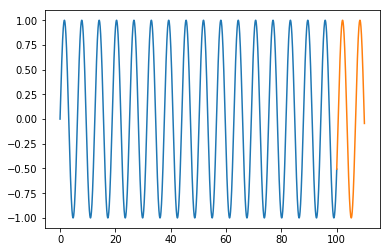

In [82]:
plt.plot(np.linspace(start=0,stop=100,num=10000,dtype=np.float32),seq_train)
plt.plot(np.linspace(start=100,stop=110,num=1000,dtype=np.float32),seq_test)
plt.show()


In [84]:
X_train,y_train=generate(seq_train)
print(X_train.shape,y_train.shape)

X_test,y_test=generate(seq_test)
print(X_test.shape,y_test.shape)

(9990, 1, 10) (9990, 1)
(990, 1, 10) (990, 1)


In [86]:
#reshape to (batch,time_steps,input_size)

X_train=np.reshape(X_train,newshape=(-1,TIME_STEPS,1))
print(X_train.shape,y_train.shape)
X_test=np.reshape(X_test,newshape=(-1,TIME_STEPS,1))
print(X_test.shape,y_test.shape)

(9990, 10, 1) (9990, 1)
(990, 10, 1) (990, 1)


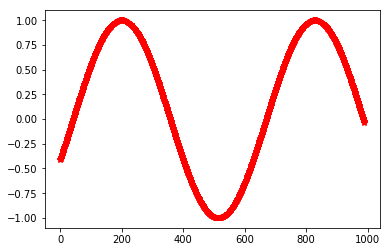

In [89]:
plt.plot(range(990),y_test[:990,0],"r*")


In [92]:
BATCH_SIZE=128
HIDDEN_UNITS=1
LEARNING_RATE=0.001
EPOCH=150

graph=tf.Graph()
with graph.as_default():
    #place hoder
    X_p=tf.placeholder(dtype=tf.float32,shape=(None,TIME_STEPS,1),name="input_placeholder")
    y_p=tf.placeholder(dtype=tf.float32,shape=(None,1),name="pred_placeholder")
    
    #lstm instance
    lstm_cell=rnn.BasicLSTMCell(num_units=HIDDEN_UNITS)

    #initialize to zero
    init_state=lstm_cell.zero_state(batch_size=BATCH_SIZE,dtype=tf.float32)

    #dynamic rnn
    outputs,states=tf.nn.dynamic_rnn(cell=lstm_cell,inputs=X_p,initial_state=init_state,dtype=tf.float32)
    #print(outputs.shape)
    h=outputs[:,-1,:]
    #print(h.shape)
    #---------------------------------define loss and optimizer----------------------------------#
    mse=tf.losses.mean_squared_error(labels=y_p,predictions=h)
    #print(loss.shape)
    optimizer=tf.train.AdamOptimizer(LEARNING_RATE).minimize(loss=mse)
    init=tf.global_variables_initializer()


epoch: 1
average training loss: 0.5115725149710973
average test loss: 0.4906694484608514
epoch: 2
average training loss: 0.44029675471859103
average test loss: 0.4224457804645811
epoch: 3
average training loss: 0.33134478258971983
average test loss: 0.3372072992580278
epoch: 4
average training loss: 0.2523102140149627
average test loss: 0.2952173485287598
epoch: 5
average training loss: 0.21856869434197554
average test loss: 0.26301223625029835
epoch: 6
average training loss: 0.19105376712142083
average test loss: 0.22967279702425003
epoch: 7
average training loss: 0.16425700126609838
average test loss: 0.19697810656258039
epoch: 8
average training loss: 0.13971348800577033
average test loss: 0.16767067102981464
epoch: 9
average training loss: 0.11891733074429421
average test loss: 0.143151237629354
epoch: 10
average training loss: 0.10219057488183562
average test loss: 0.12338101611073528
epoch: 11
average training loss: 0.08901226479345216
average test loss: 0.10759225647364344
epoch

average training loss: 0.005138184678239318
average test loss: 0.005071439730402615
epoch: 91
average training loss: 0.005014061456164107
average test loss: 0.0049456706869282895
epoch: 92
average training loss: 0.0048933837000125395
average test loss: 0.004823502884911639
epoch: 93
average training loss: 0.0047760575976915276
average test loss: 0.004704833047331444
epoch: 94
average training loss: 0.004661990240819227
average test loss: 0.004589557913797242
epoch: 95
average training loss: 0.004551089465773354
average test loss: 0.004477583769974964
epoch: 96
average training loss: 0.004443269986390637
average test loss: 0.00436881508877767
epoch: 97
average training loss: 0.0043384442531253
average test loss: 0.004263154430580991
epoch: 98
average training loss: 0.004236525681335479
average test loss: 0.004160513037017414
epoch: 99
average training loss: 0.004137433715349732
average test loss: 0.004060800677897143
epoch: 100
average training loss: 0.004041089011409964
average test lo

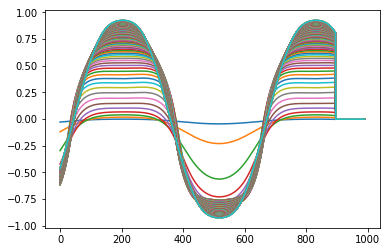

In [94]:
#-------------------------------------------Define Session---------------------------------------#
with tf.Session(graph=graph) as sess:
    sess.run(init)
    for epoch in range(1,EPOCH+1):
        results = np.zeros(shape=(TEST_EXAMPLES, 1))
        train_losses=[]
        test_losses=[]
        print("epoch:",epoch)
        for j in range(TRAIN_EXAMPLES//BATCH_SIZE):
            _,train_loss=sess.run(
                    fetches=(optimizer,mse),
                    feed_dict={
                            X_p:X_train[j*BATCH_SIZE:(j+1)*BATCH_SIZE],
                            y_p:y_train[j*BATCH_SIZE:(j+1)*BATCH_SIZE]
                        }
            )
            train_losses.append(train_loss)
        print("average training loss:", sum(train_losses) / len(train_losses))


        for j in range(TEST_EXAMPLES//BATCH_SIZE):
            result,test_loss=sess.run(
                    fetches=(h,mse),
                    feed_dict={
                            X_p:X_test[j*BATCH_SIZE:(j+1)*BATCH_SIZE],
                            y_p:y_test[j*BATCH_SIZE:(j+1)*BATCH_SIZE]
                        }
            )
            results[j*BATCH_SIZE:(j+1)*BATCH_SIZE]=result
            test_losses.append(test_loss)
        print("average test loss:", sum(test_losses) / len(test_losses))
        plt.plot(range(990),results[:990,0])
    plt.show()
